In [357]:
# Real pergunta: Qual é a probabilidade de um passageiro sobreviver no Titanic? Dados os dados a seguir.

### Análise exploratória de dados: 
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar tendências e relações entre diferentes parâmetros. 

In [358]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns 
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

### Lendo Train e Test

In [359]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [360]:
train.set_index('PassengerId', inplace=True)

In [361]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [362]:
train.shape, test.shape

((891, 11), (418, 10))

In [363]:
data = pd.concat([train, test], sort=True) # Juntando os dois dataframes

In [364]:
data.head() # Colocou a coluna survived

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### Traduzindo colunas

In [365]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [366]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo', 'IrmaosConjugue', 'Sobreviveu', 'Bilhete']

### Mapeando sexo, Male='Homem' e Female='Mulher'

In [367]:
sexo = {'male':'homem', 'female':'mulher'} # Adicionando valores a esse dicionario

In [368]:
data['Sexo'] = data['Sexo'].map(sexo) # Mapeando e transformando os valores

In [369]:
data

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjugue,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,homem,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,homem,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,homem,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,mulher,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,homem,0,NaN,SOTON/O.Q. 3101262


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Idade           1046 non-null   float64
 1   Cabine          295 non-null    object 
 2   Embarque        1307 non-null   object 
 3   Tarifa          1308 non-null   float64
 4   Nome            1309 non-null   object 
 5   PaisFilhos      1309 non-null   int64  
 6   Classe          1309 non-null   int64  
 7   Sexo            1309 non-null   object 
 8   IrmaosConjugue  1309 non-null   int64  
 9   Sobreviveu      891 non-null    float64
 10  Bilhete         1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Parâmetros categóricos

###### Nominais

In [371]:
# Sexo
# Embarque
# Sobreviveu

#### Ordinal

In [372]:
# Classe

### Parâmetro Numéricos

#### Contínuo

In [373]:
# Idade
# Tarifa

#### Discreto

In [374]:
# IrmaoConjugue
# PaisFilhos

### Parâmetro alfanumérico

In [375]:
# Bilhete

#### Verificando dados incompletos

In [376]:
data.isnull().sum()

Idade              263
Cabine            1014
Embarque             2
Tarifa               1
Nome                 0
PaisFilhos           0
Classe               0
Sexo                 0
IrmaosConjugue       0
Sobreviveu         418
Bilhete              0
dtype: int64

In [377]:
moda_embarque = data['Embarque'].mode()[0]

In [378]:
data['Embarque'].fillna(moda_embarque, inplace=True) # preenchendo o nulo com a moda

#### Informações gerais

In [379]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjugue,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


#### Informações gerais de parâmetros categóricos

In [380]:
data.describe(include=['O']) 

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homem,CA. 2343
freq,6,916,2,843,11


### Tamanho da amostra

In [381]:
len(data)

1309

In [382]:
# proporção total da amostra em relação à população
len(train)/2224

0.4006294964028777

In [383]:
# proporção de sobreviventes (População)

In [384]:
(1-1502/2224)*100

32.46402877697842

In [385]:
# proporção de sobreviventes (População)
342/len(train)

0.3838383838383838

# Agrupamentos

### Agrupar Classe x Sobrevivência

In [386]:
# Agrupando media de sobreviventes por classe
data[['Classe', 'Sobreviveu']].groupby(['Classe']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


### Agrupar Sexo X Sobrevivência

In [387]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


### Agrupar IrmaosConjugue X Sobrevivência

In [388]:
data[['IrmaosConjugue', 'Sobreviveu']].groupby(['IrmaosConjugue']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjugue,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos X Sobreviveu

In [389]:
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjugue e PaisFilhos

In [390]:
data[['IrmaosConjugue', 'PaisFilhos']].corr() 
# Não possui uma boa relacao, entao é possível fazer outra coluna para colocar totalFamilia

,IrmaosConjugue,PaisFilhos
IrmaosConjugue,1.000000,0.373587
PaisFilhos,0.373587,1.000000


### Visualização dos dados

Text(0, 0.5, '')

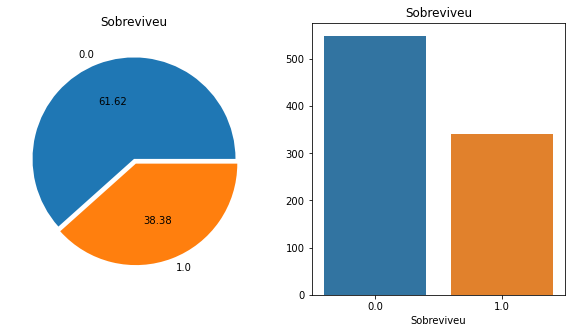

In [391]:
f, ax = plt.subplots(1,2, figsize=(10, 5))

data['Sobreviveu'].value_counts().plot.pie(explode=[0, 0.05], autopct='%0.2f', ax=ax[0])

ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')

sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

In [392]:
# Sobrevivencia por sexo
data.groupby(['Sexo', 'Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [393]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<AxesSubplot:xlabel='Sexo', ylabel='count'>

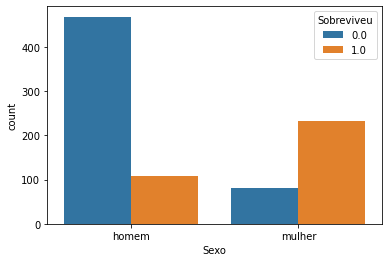

In [394]:
# gráfico sendo observado sobreviventes por sexo
sns.countplot('Sexo', hue='Sobreviveu', data=data)

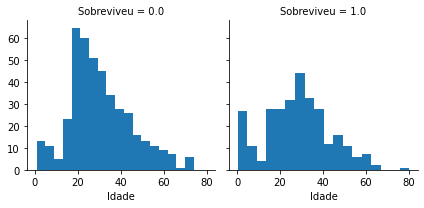

In [395]:
# histograma da idade vs sobrevivencia
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

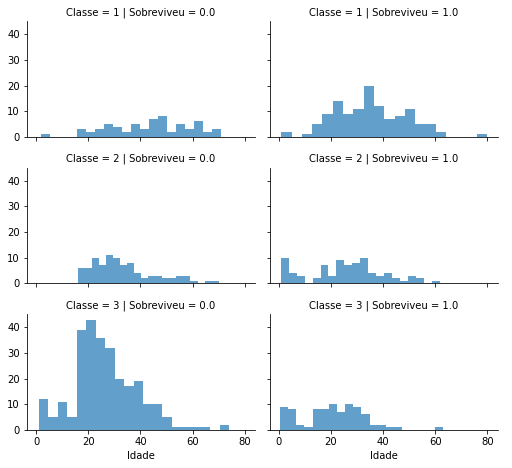

In [396]:
# histograma de idade x classe x sobreviveu com FacetGrid
grid = sns.FacetGrid(data, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Idade', alpha=0.7, bins=20)
grid.add_legend()

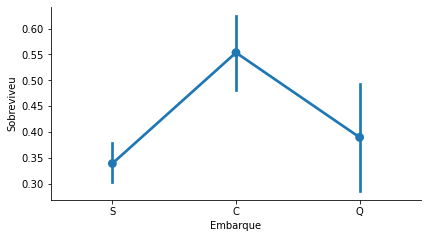

In [397]:
# chances de sobrevivencia por porto de embarque
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

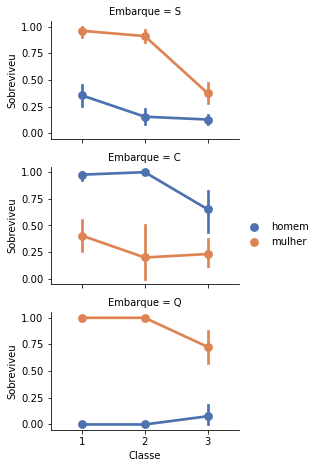

In [398]:
# embarque x classe x sobreviveu
grid = sns.FacetGrid(data, row='Embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend()

In [399]:
# agrupando mulheres por sobrevivência
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjugue
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


In [400]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjugue
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


In [401]:
# crosstab de sobrevivencia por classe
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True).style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<AxesSubplot:ylabel='PassengerId'>

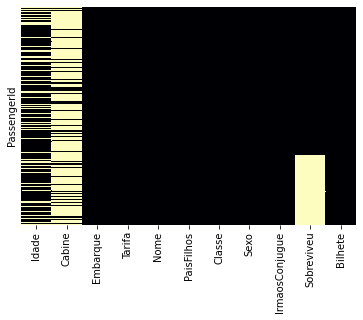

In [402]:
# visualizando dados faltando
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [403]:
# removendo coluna cabine
data.drop(['Cabine'], axis=1, inplace=True)

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

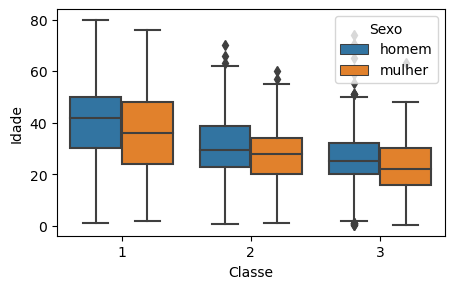

In [404]:
# boxplot de classe por sexo
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

In [405]:
# engenharia de recursos, extraindo titulo do nome
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [406]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [407]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [408]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [409]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [410]:
data.loc[data['Titulo']=='Master'].mean()

Idade              5.482642
Tarifa            36.008195
PaisFilhos         1.377049
Classe             2.655738
IrmaosConjugue     2.049180
Sobreviveu         0.575000
dtype: float64

In [411]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [412]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Será que mulheres e crianças sobreviveram ou morreram juntas?

In [413]:
# Extrair sobrenome para identificar possíveis famílias
data['Sobrenome'] =  data['Nome'].str.split(',').str[0]

In [414]:
# Verificando as maiores famílias
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

In [415]:
# Analisar sobrevivencia de mulheres e crianças da família "Andersson"
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome'] == 'Andersson'].loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


In [416]:
# testando com outra familia
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome'] == 'Sage'].loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


In [417]:
# Familia brown
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome'] == 'Brown'].loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


In [418]:
# criando dataframe para mulher ou crianca
MulherOuCrianca = data.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]

In [419]:
MulherOuCrianca

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjugue,Sobreviveu,Bilhete,Titulo,Sobrenome
PassengerId,,,,,,,,,,,,
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599,Casada,Cumings
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282,Solteira,Heikkinen
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803,Casada,Futrelle
8,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,homem,3,0.0,349909,Menino,Palsson
9,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,mulher,0,1.0,347742,Casada,Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,mulher,0,NaN,365237,Solteira,Naughton
1303,37.0,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,mulher,1,NaN,19928,Casada,Minahan
1304,28.0,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,3,mulher,0,NaN,347086,Solteira,Henriksson


In [420]:
# Criando uma feature "TamanhoGrupo", que se refere a quantidade de pessoas que possuem o mesmo sobrenome
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome'] == x]['Sobreviveu'].count())

In [421]:
data[['TamanhoGrupo', 'Sobrenome', 'Titulo', 'Sobreviveu']].sort_values(by='TamanhoGrupo', ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [422]:
for index, _ in data.iterrows():
    if data['Titulo'].at[index] == 'HomemAdulto':
        data['TamanhoGrupo'].at[index] = 0

#### Criando recurso "SobrevivenciaGrupo"

In [423]:
# Aqui demonstra que apenas 16% das pessoas da familia com sobrenome Andersson sobreviveram
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome'] == 'Andersson'].loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'menino')].mean()['Sobreviveu']

0.16666666666666666

In [424]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome'] == x].loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'menino')].mean()['Sobreviveu'])

In [425]:
for index, _ in data.iterrows():
    if data['Titulo'].at[index] == 'HomemAdulto':
        data['SobrevivenciaGrupo'].at[index] = 0

In [426]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,0.0,HomemAdulto
...,...,...
1305,0.0,HomemAdulto
1306,NaN,Outros
1307,0.0,HomemAdulto


In [427]:
data['SobrevivenciaGrupo'].isnull().sum() # testando se existe dados faltando

139

In [428]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True) # preenchendo os dados faltando com 0.

In [429]:
data['SobrevivenciaGrupo'].isnull().sum() # testando novamente se existe dados faltando

0

### Grupo de mulheres e crianças onde todos morreram juntos

In [430]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo'] == 'menino')]['Sobrenome'].unique()

array(['Vander Planke', 'Palsson', 'Goodwin', 'Zabour', 'Jussila',
       'Boulos', 'Ford', 'Skoog', 'Sage', 'Strom', 'Lefebre', 'Allison',
       'Barbara', 'Van Impe', 'Bourke', 'Panula', 'Rice', 'Coutts',
       'Moubarek'], dtype=object)

In [431]:
# quantidade de pessoas que faleceram
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo'] == 'menino')]['Sobreviveu'].count()

37

In [432]:
# familia que sobreviveu
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo'] == 'menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Asplund', 'Nicola-Yarred', 'Laroche',
       'Harper', 'West', 'Fortune', 'Doling', 'Peter', 'Brown', 'Newell',
       'Collyer', 'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly',
       'Hays', 'Ryerson', 'Wick', 'Caldwell', 'Goldsmith', 'Hippach',
       'Richards', 'Hart', 'Baclini', 'Quick', 'Taussig', 'Herman',
       'Becker', 'Moor'], dtype=object)

In [433]:
# quantidade de familia que sobreviveu
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo'] == 'menino')]['Sobreviveu'].count()

61

In [434]:
# grupos de mulheres e crianças com sobrevivencia mista
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']>0) & (data['SobrevivenciaGrupo']<1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo'] == 'menino')]['Sobreviveu'].unique()

array([ 1.,  0., nan])

In [435]:
# quantidade de pessoas (sobrevivencia mista)
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']>0) & (data['SobrevivenciaGrupo']<1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo'] == 'menino')]['Sobreviveu'].count()

9

### Criar recurso ExpectativaDeVida

In [436]:
data['ExpectativaDeVida'] = ''

# viver
# morrer
# desconhecida

for index,_ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[index]==0) & (data['TamanhoGrupo'].at[index] > 1):
        data['ExpectativaDeVida'].at[index] = 'morrer'
    elif (data['SobrevivenciaGrupo'].at[index]==1) & (data['TamanhoGrupo'].at[index] > 1):
        data['ExpectativaDeVida'].at[index] = 'viver'
    else:
        data['ExpectativaDeVida'].at[index] = 'desconhecida'

In [437]:
data['ExpectativaDeVida']

PassengerId
1       desconhecida
2       desconhecida
3       desconhecida
4       desconhecida
5       desconhecida
            ...     
1305    desconhecida
1306    desconhecida
1307    desconhecida
1308    desconhecida
1309           viver
Name: ExpectativaDeVida, Length: 1309, dtype: object

In [438]:
pd.crosstab(data['ExpectativaDeVida'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecida,495,264
morrer,52,7
viver,2,71


#### Removendo as colunas desnecessárias

In [439]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjugue          0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [440]:
data.drop(['Nome', 'Bilhete', 'Sobrenome'], axis=1, inplace=True)

# Dados categóricos vamos transformar em variáveis dummy

In [441]:
data.describe(include='O')

,Embarque,Sexo,Titulo,ExpectativaDeVida
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,HomemAdulto,desconhecida
freq,916,843,757,1150


In [442]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo', 'ExpectativaDeVida', 'Sexo'], drop_first=True)

In [443]:
data.columns

Index(['Idade', 'Tarifa', 'PaisFilhos', 'IrmaosConjugue', 'Sobreviveu',
       'TamanhoGrupo', 'SobrevivenciaGrupo', 'Classe_2', 'Classe_3',
       'Embarque_Q', 'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher'],
      dtype='object')

In [444]:
data.shape

(1309, 18)

#### Usar predicao de idade

In [445]:
idade = pd.read_csv('idade_completa.csv')

In [446]:
idade.set_index('IdPassageiro', inplace=True) # transformando o Id Passageiro como index

In [447]:
idade.shape

(1309, 1)

In [448]:
data.drop('Idade', axis=1, inplace=True)

In [449]:
data = pd.concat([data, idade], axis = 1) # juntando os dois dataframes

In [450]:
data.shape

(1309, 18)

In [451]:
data

,Tarifa,PaisFilhos,IrmaosConjugue,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher,Idade
1,7.2500,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,22.000000
2,71.2833,0,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,1,38.000000
3,7.9250,0,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,1,26.000000
4,53.1000,0,1,1.0,1,1.0,0,0,0,1,0,0,0,0,0,0,1,35.000000
5,8.0500,0,0,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,8.0500,0,0,NaN,0,0.0,0,1,0,1,1,0,0,0,0,0,0,29.088798
1306,108.9000,0,0,NaN,0,0.0,0,0,0,0,0,0,1,0,0,0,1,39.000000
1307,7.2500,0,0,NaN,0,0.0,0,1,0,1,1,0,0,0,0,0,0,38.500000
1308,8.0500,0,0,NaN,0,0.0,0,1,0,1,1,0,0,0,0,0,0,29.088798


#### Preenchendo a tarifa que está nula, com a tarifa media

In [452]:
tarifa_media = data['Tarifa'].mean()
tarifa_media

33.2954792813456

In [453]:
data['Tarifa'].fillna(tarifa_media, inplace=True) # prenchendo o que tem NaN com o valor

In [454]:
data.isnull().sum()

Tarifa                        0
PaisFilhos                    0
IrmaosConjugue                0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
dtype: int64

#### Criando faixa etaria para as idades

In [455]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'), bins=5) # bins é faixa e astype é transformacao dos dados para int

In [456]:
pd.crosstab(data['FaixaEtaria'], data['Sobreviveu']) # é categorico

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


In [457]:
data = pd.get_dummies(data, columns=['FaixaEtaria'], drop_first=True)

In [458]:
data.shape

(1309, 22)

In [459]:
data.head()

,Tarifa,PaisFilhos,IrmaosConjugue,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,...,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher,Idade,"FaixaEtaria_(16.0, 32.0]","FaixaEtaria_(32.0, 48.0]","FaixaEtaria_(48.0, 64.0]","FaixaEtaria_(64.0, 80.0]"
1,7.2500,0,1,0.0,0,0.0,0,1,0,1,...,0,0,0,0,0,22.0,1,0,0,0
2,71.2833,0,1,1.0,1,1.0,0,0,0,0,...,0,0,0,0,1,38.0,0,1,0,0
3,7.9250,0,0,1.0,1,1.0,0,1,0,1,...,0,1,0,0,1,26.0,1,0,0,0
4,53.1000,0,1,1.0,1,1.0,0,0,0,1,...,0,0,0,0,1,35.0,0,1,0,0
5,8.0500,0,0,0.0,0,0.0,0,1,0,1,...,0,0,0,0,0,35.0,0,1,0,0


# Link sobre explicacao da variavel dummy: https://medium.com/data-hackers/vari%C3%A1veis-dummy-o-que-%C3%A9-quando-usar-e-como-usar-78de66cfcca9

#### Criar recurso "Familiares" (Feature Engeneering)

In [460]:
data['Familiares'] = data['IrmaosConjugue'] + data['PaisFilhos']

<AxesSubplot:>

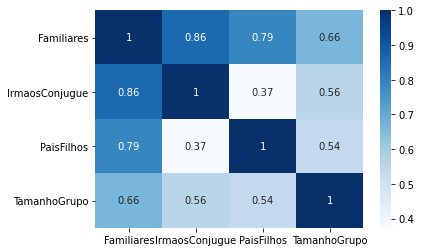

In [461]:
sns.heatmap(data[['Familiares', 'IrmaosConjugue', 'PaisFilhos', 'TamanhoGrupo']].corr(), annot=True, cmap='Blues')

### Criar parâmetro "sozinho" (Feature Engineering)

In [462]:
sozinho = data['Familiares'] == 0

In [463]:
data['Sozinho'] = sozinho.map({True: 1, False: 0})

In [464]:
data.shape

(1309, 24)

### Atualizando o train e test

In [465]:
train.shape

(891, 11)

In [466]:
train = data.loc[train.index] # pegando so os dados referentes ao train

In [467]:
train.shape

(891, 24)

In [468]:
test.shape

(418, 10)

In [469]:
test = data.loc[test.index]

In [470]:
test.shape

(418, 24)

In [471]:
test.drop('Sobreviveu', axis = 1, inplace=True) # tirando a coluna que nao vai ter no test

In [472]:
test.shape

(418, 23)

In [473]:
train.isnull().sum()

Tarifa                      0
PaisFilhos                  0
IrmaosConjugue              0
Sobreviveu                  0
TamanhoGrupo                0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Sexo_mulher                 0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

In [474]:
test.isnull().sum()

Tarifa                      0
PaisFilhos                  0
IrmaosConjugue              0
TamanhoGrupo                0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Sexo_mulher                 0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

### Utilizando o train para treinar o modelo

In [475]:
X = train.drop('Sobreviveu', axis=1)

In [476]:
y = train['Sobreviveu']

In [477]:
X.shape, y.shape

((891, 23), (891,))

In [478]:
# Escolhendo colunas
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjugue', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho'],
      dtype='object')

In [479]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjugue', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho']

In [480]:
X = X[recursos] # Selecionando as colunas

### Importando train_test_split para dividir e preparar para treino

In [481]:
from sklearn.model_selection import train_test_split

In [482]:
# Dividir 70% para treinar e 30% para testar
# É pegar aleatoriamente todos do 891 valores 70% para x_train e x_test 30%, todos totalmente embaralhados y_train vai ser a resposta do X_train e y_test a resposta do x_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [483]:
X_train.shape, y_train.shape

((623, 23), (623,))

In [484]:
X_test.shape, y_test.shape

((268, 23), (268,))

# Machine Learning

#### Importando modelos preditivos

In [485]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [486]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#### Criando uma classe ModeloAuxiliar
Uma classe modelo auxiliar para evitar duplicação de código

In [487]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [488]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [489]:
resultados = []

for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo']) #Vai instanciar esse valor e passar como parametro para a funcao e armazernar esse valor em uma variavel
    x.fit(X_train, y_train) # treinar o modelo a funcao fit faz isso
    
    # gerar predicao
    x_pred = x.predict(X_test)
    
    #gerar score, a assertivade do teste
    acuracidade = round(x.score(X_test, y_test)*100, 2)
    
    resultados.append({'nome': model['nome'],  # criando um resultado dos diferentes tipos de testes 
                        'score': acuracidade,   # Adicionando esses valores a uma lista de dicionarios
                       'pred': x_pred})

In [490]:
models = pd.DataFrame(resultados)

In [491]:
# Exibindo os valores que tiveram o melhor resultado de acordo com os testes
models[['nome', 'score']].sort_values(by='score', ascending = False)

,nome,score
2,gradboost,91.42
0,logreg,90.30
8,LinearSVC,90.30
3,adaboost,89.93
11,RForest,88.43
6,GaussianNB,87.31
9,SGD,85.82
1,etree,84.33
10,Dtree,83.96
5,KNN,75.37


### Validação Cruzada (Cross-Validation)

In [492]:
# A validacao cruzada faz um teste mais randomico para nao superadequar o seu modelo, e por fim o final terá uma melhor ideia como ele irá se comportar no mundo real

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [493]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [494]:
# Esse aqui é o teste que será utilizado para treinar os dados 
# X_train são os dados
# y_train os resultados
# kfold é a quantidade de testes
# scoring é o tipo de resultado que queremos
ada = AdaBoostClassifier(n_estimators = 200, random_state=123, learning_rate=0.1)

In [495]:
resultado = cross_val_score(ada, X_train, y_train, cv=kfold, scoring='accuracy')

In [496]:
print('O Score cross-validade do AdaBoost é: ', resultado.mean())

O Score cross-validade do AdaBoost é:  0.8843061955965181


In [497]:
resultado

array([0.92063492, 0.9047619 , 0.9047619 , 0.91935484, 0.88709677,
       0.91935484, 0.85483871, 0.90322581, 0.82258065, 0.80645161])

In [498]:
ada.fit(X_train, y_train) # Treinando com o Ada

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [499]:
ada_pred = ada.predict(X_test)
ada_pred # Vai gerar a predicao de quem vai viver e quem vai morrer

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

# Matriz de confusão
Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão (Confusion Matrix) que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.


In [500]:
from sklearn.metrics import confusion_matrix

Text(0.5, 15.0, 'REAL')

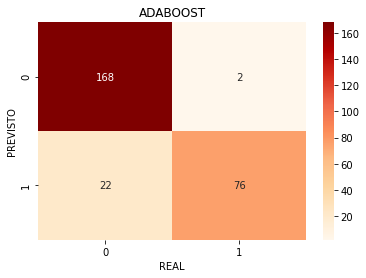

In [501]:
sns.heatmap(confusion_matrix(y_test, ada_pred), cmap='OrRd', annot=True, fmt='2.0f')

plt.title('ADABOOST')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')

#### Interpretando a matriz confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

- O número de predições corretas para o AdaBoost é de 168 (Mortes) + 76 (Sobreviventes)

- Erros:
 - Classificou erradamente 2 como mortes (Falso negativo)
 - E 22 como vivos (Falso positivo)

In [502]:
from sklearn.metrics import (recall_score, accuracy_score, precision_score, f1_score)

In [503]:
# revocação
recall_score(y_test, ada_pred)

0.7755102040816326

In [504]:
# acuracidade
accuracy_score(y_test, ada_pred)

0.9104477611940298

In [505]:
# precisão
precision_score(y_test, ada_pred)

0.9743589743589743

In [506]:
# f1-score
f1_score(y_test, ada_pred)

0.8636363636363635

### Texto explicando sobre matriz de confusão e etc

https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

# Curva ROC e AUC

O formato da curva contém várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos.

- O quanto menor for o eixo x, menor a quantidade de falsos positivos e maior verdadeiros negativos.

- Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

In [507]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem Habilidade: ROC AUC=0.500
AdaBoost: ROC AUC=0.934


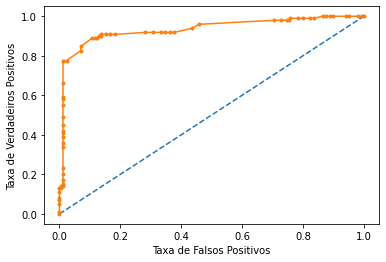

In [508]:
ns_probs = [0 for _ in range(len(y_test))] # gerando um modelo que nao tem habilidade

ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)

ada_auc = roc_auc_score(y_test, ada_probs)

print("Sem Habilidade: ROC AUC=%.3f"%(ns_auc))
print("AdaBoost: ROC AUC=%.3f"%(ada_auc))

# calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem habilidade')
plt.plot(ada_tfp, ada_tvp, marker='.', label='AdaBoost')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')


plt.show()

#### Selecionando Threshold (Limite)

In [509]:
pred_proba = ada_probs >= 0.5

In [510]:
pred_proba = pd.Series(pred_proba).map({False: 0, True: 1}).values

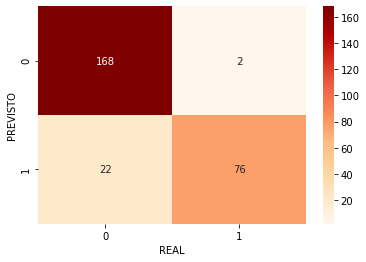

In [511]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap='OrRd', annot=True, fmt='2.0f')

plt.ylabel('PREVISTO')
plt.xlabel('REAL')

plt.show()

# Customização de Hyper-Parâmetros

Parâmetros:

n_jobs: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

n_estimators: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão).

max_depth: Profundidade da árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar (overfit) o modelo. 

min_samples_leaf: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

verbose: Controla a saída de textos durante o processo de aprendizagem. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração. 


In [512]:
from sklearn.model_selection import GridSearchCV

#### Random Forest

In [513]:
# Escolhendo a melhor quantidade de parâmetros para definir a melhor combinacao para o modelo

rf_params = {
    'n_estimators': [100,200],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                 param_grid=rf_params, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8908774193548388
RandomForestClassifier(max_depth=4, min_samples_leaf=3, n_estimators=200,
                       random_state=123)


In [514]:
gd_pred = gd.predict(X_test) # basicamente só chama a funcao de predicao, com a melhor predicao possível e passa o teste
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

# Ensembling

É uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:

- Classificação de Votos (Voting Classifier)
- Ensacamento (Bagging)
- Impulsionamento (Boosting)


In [515]:
# Classificação de votos

misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [516]:
from sklearn.ensemble import VotingClassifier

meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train, y_train)

print('Score', meu_ensemble.score(X_test, y_test))
cross = cross_val_score(meu_ensemble, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.9029850746268657
Score cross-validado 0.8806267806267807


#### Ensacamento

O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade.

##### Ensacamento KNN

Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [517]:
from sklearn.ensemble import BaggingClassifier

In [518]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state = 123, n_estimators=100)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Score', knn.score(X_test, y_test))
cross = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.7313432835820896
Score cross-validado 0.7237891737891738


#### Ensacamento DecisionTree

In [519]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state = 123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred = knn.predict(X_test)

print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.8843283582089553
Score cross-validado 0.8659544159544158


#### Impulsionamento

Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

##### GradientBoostingClassifier

In [520]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123, learning_rate=0.1)

grad.fit(X_train, y_train)
grad_pred = dtree.predict(X_test)

print('Score', grad.score(X_test, y_test))
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.9067164179104478
Score cross-validado 0.8586894586894587


#### Configurando Hyper-parametros para o adaboost

In [521]:
n_estimator = [100, 200]
learn_rate = [0.05, 0.1, 0.3]

hyper={'n_estimators': n_estimator, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8908903225806452
AdaBoostClassifier(learning_rate=0.3, n_estimators=200)


In [522]:
adaboost_pred = gd.predict(X_test)

In [523]:
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

# Importância de recursos (Feature Importance)

In [524]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [525]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)

In [526]:
rf_features = rf.feature_importances(X_train, y_train)

In [527]:
rf_features

array([3.42937422e-02, 2.16283038e-03, 3.22045985e-03, 1.27339984e-01,
       2.46628161e-01, 1.65321119e-03, 4.69542316e-02, 7.31644096e-05,
       4.40091795e-03, 1.42417596e-01, 2.85576697e-03, 1.38231718e-03,
       6.34353402e-02, 2.66843238e-02, 7.26948080e-02, 1.95096389e-01,
       4.56968159e-03, 1.18118880e-03, 3.16771034e-04, 2.08103983e-04,
       0.00000000e+00, 1.31617760e-02, 9.26923428e-03])

In [528]:
cols = X_train.columns.values

In [529]:
feature_dataframe = pd.DataFrame({'recursos': cols, 'Importância de Recursos RForest': rf_features})

In [530]:
feature_dataframe

,recursos,Importância de Recursos RForest
0,Tarifa,0.034294
1,PaisFilhos,0.002163
2,IrmaosConjugue,0.003220
3,TamanhoGrupo,0.127340
4,SobrevivenciaGrupo,0.246628
5,Classe_2,0.001653
6,Classe_3,0.046954
7,Embarque_Q,0.000073
8,Embarque_S,0.004401
9,Titulo_HomemAdulto,0.142418


<AxesSubplot:ylabel='recursos'>

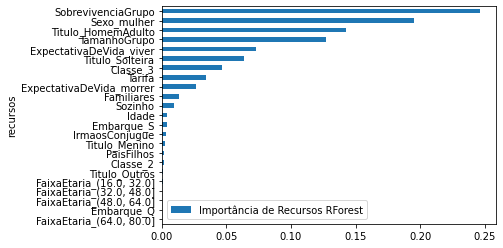

In [531]:
feature_dataframe.sort_values(by='Importância de Recursos RForest').plot.barh(x='recursos') # Analise de verificar as features (Colunas) que são mais importantes para o desenvolvimento do modelo do Random Forest 

In [532]:
meu_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [533]:
meu_ensemble.score(X_test, y_test)

0.9029850746268657

In [534]:
test[recursos].shape

(418, 23)

In [535]:
X_test.shape

(268, 23)

In [541]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [542]:
ensemble_pred.shape

(418,)

In [543]:
test.shape

(418, 23)

# Submissão

In [549]:
submissao = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': ensemble_pred
})

In [550]:
submissao.shape

(418, 2)

In [551]:
submissao['Survived'] = submissao['Survived'].astype('int') # transformando para int a feature

In [552]:
submissao

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [553]:
submissao.to_csv('meu_ensemble', index=False)